# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# 1. Изучение данных из файла

**Загрузим нужные библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузим  Data Frame**

In [2]:
data = pd.read_csv('~/GitHub/lesson3/real_estate_data.csv')

**Выведем на печать первые 5 строк таблицы для ознакомления**

In [3]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


**Данные склеились, необходимо разделить их сепаратором**

In [4]:
data = pd.read_csv('~/GitHub/lesson3/real_estate_data.csv', sep='\t')

**Снова выводим первые 5 строк Data Frame для проверки**

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Устранили склейку. Теперь вызовем метод info()**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**В Data Frame имеются столбцы различных типов данных, имеются строковые, например first_day_exposition. Много столбцов типа float, некоторые из них для удобства можно будет перевести в int. Имеются пропуски, рассмотрим их количество ниже**

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Много пропусков. Проверим количество дубликатов**

In [8]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


# **Вывод**

Data Frame содержит 22 столбца и 23699 строк. Имеются множественные пропуски, которые необходимо будет заполнить разными методами. Некоторые будем заполнять нулями или False, количественные - медианами, а некоторые данные, возможно, получится достать из уже имеющихся.
Пока неясно к какому типу данные пропуски относяться к полностью случайным, случайным или не случайным. Уточним эту информацию на предобработке данных.
Data Frame также содержит различные типы данных, которые мы также преобразуем на втором шаге - предобработка данных. Дубликатов в данных нет.

# 2. Предобработка данных

**Рассмотим высоту потолков**

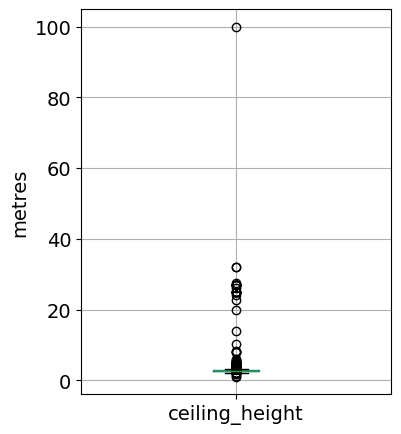

In [9]:
data.boxplot(['ceiling_height'], figsize = (4, 5), fontsize = 14)
plt.ylabel('metres', fontsize = 14)
plt.show()

**Имеется выброс, круто иметь квартиру с потолками в 100 метров. Также же менее круто потолки больше 20 метров. Выведем часть таблицы в этими данными.**

In [10]:
data[data.ceiling_height > 20].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


In [11]:
data[data.ceiling_height >= 100].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


**Скорее всего ошибка возникла при заполнении анкеты. А в потолки в 2,7 метра верится больше чем в потолок 27.0 метров. Единственный выброс - потолок в 100 метров. Для меня не совсем понятно как он мог появиться. Удалю его из Data Frame, а остальные аномальные значения думаю поделить на 10.**

In [12]:
data = data.drop([22869]) 

In [13]:
data['ceiling_height'] = data['ceiling_height'].apply( lambda x: x if (x < 20) else x/10 )

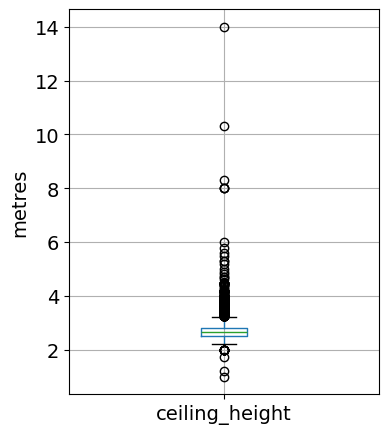

In [14]:
data.boxplot(['ceiling_height'], figsize = (4, 5), fontsize = 14)
plt.ylabel('metres', fontsize = 14)
plt.show()

**Как видим из графика у нас есть пару квартир с аномально низкими потолками (менее 2 метров) и квартиры с аноально высокими потолками (более 3,5 метров). Так сказать точно не могу откуда идет ошибка (при выгрузке данных или заполнении анкеты), и наблюдений менее 1 % от общего числа в Data Frame, на основании выше изложенного принимаю решение удалить их из таблицы.**

In [15]:
data.drop(data[data.ceiling_height > 3.5].index, inplace = True)
data.drop(data[data.ceiling_height < 2.001].index, inplace = True)

**Посмотрим на boxplot**

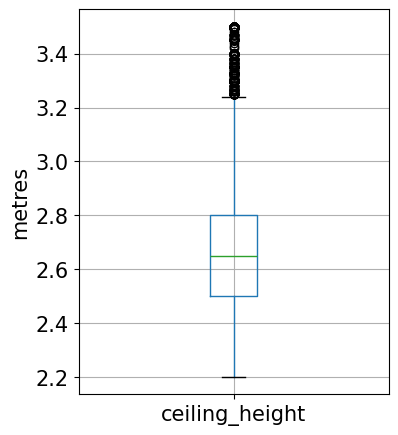

In [16]:
data.boxplot(['ceiling_height'], figsize = (4, 5), fontsize = 15)
plt.ylabel('metres', fontsize = 15)
plt.show()

**Зададим новые индексы,так как мы удаляли строки и нумерация нарушилась. Также выведем часть таблицы.**

In [17]:
data.reset_index(inplace = True)
data.head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Столбец с индексами можно удалить.**

In [18]:
data.drop(labels = 'index', axis = 1, inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Посмотрим на среднее и медианное значение высоты потолков.**

In [19]:
print('Среднее по высоте потолков: {:.2f}'.format(data.ceiling_height.mean()))
print('Медиана по высоте потолков: {:.2f}'.format(data.ceiling_height.median()))

Среднее по высоте потолков: 2.70
Медиана по высоте потолков: 2.65


**Среднее и медианное значение высоты потолков почти не отличаются друг от друга. Рассмотрим стоимость закрытия сделок по купле-продаже квартир.**

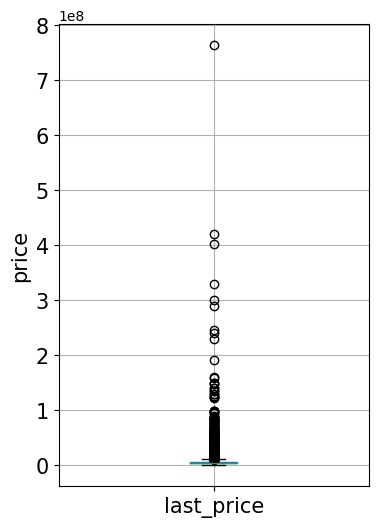

In [20]:
data.boxplot(['last_price'], figsize = (4, 6), fontsize = 15)
plt.ylabel('price', fontsize = 15)
plt.show()

In [21]:
print('Медианная стоимость квартиры : {:.0f}'.format(data['last_price'].median()))
print('Средняя стоимость квартиры : {:.0f}'.format(data['last_price'].mean()))
print('Количество квартир стоимостью более 20 млн. : {}'.format(data[data.last_price > 20000000]['last_price'].count()))
print('Количество квартир стоимостью менее 500 тыс. : {}'.format(data[data.last_price < 500000]['last_price'].count()))

Медианная стоимость квартиры : 4600000
Средняя стоимость квартиры : 6355715
Количество квартир стоимостью более 20 млн. : 639
Количество квартир стоимостью менее 500 тыс. : 14


**В нашей выборке очень мало квартир стоимостью больше 20 млн. и дешевле 500 тыс. Избавимся от этих аномальных наблюдений. И посмотрим как изменяться средняя и медианная стоимость квартир.**

In [22]:
data.drop(data[data.last_price > 20000000].index, inplace=True)
data.drop(data[data.last_price < 500000].index, inplace=True)
print('Медианная стоимость квартиры : {:.0f}'.format(data['last_price'].median()))
print('Средняя стоимость квартиры : {:.0f}'.format(data['last_price'].mean()))

Медианная стоимость квартиры : 4530000
Средняя стоимость квартиры : 5379864


**Общая площадь квартир**

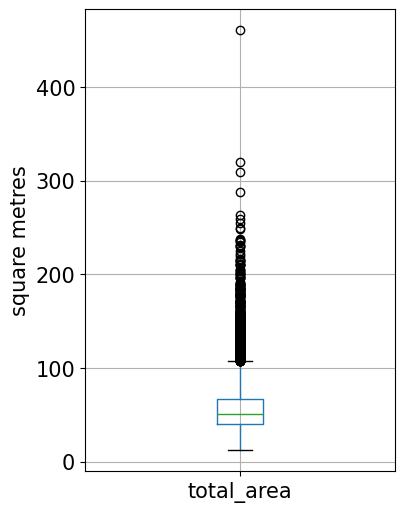

In [23]:
data.boxplot(['total_area'], figsize = (4, 6), fontsize = 15)
plt.ylabel('square metres', fontsize = 15)
plt.show()

In [24]:
print('Медианная площадь квартиры : {:.0f}'.format(data['total_area'].median()))
print('Средняя площадь квартиры : {:.0f}'.format(data['total_area'].mean()))
print('Количество квартир площадью более 120 кв. м. : {}'.format(data[data.total_area > 120]['total_area'].count()))
print('Количество квартир площадью менее 15 кв.м. : {}'.format(data[data.total_area < 15]['total_area'].count()))

Медианная площадь квартиры : 51
Средняя площадь квартиры : 56
Количество квартир площадью более 120 кв. м. : 483
Количество квартир площадью менее 15 кв.м. : 6


**Выборке присутствуют аномальные значения по площади квартир, принимаю решение удалить их, так как они составляют менее 3% от всего Data Frame. Потом снова выведем boxplot на печать, плюс повторно медианное и среднее занчение по общей площади квартир для наглядности.**

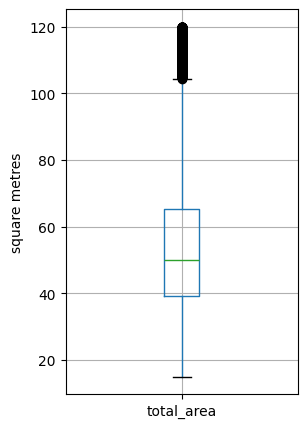

Медианная площадь квартиры : 50
Средняя площадь квартиры : 54
Количество квартир площадью более 120 кв. м. : 0
Количество квартир площадью менее 15 кв.м. : 0


In [25]:
data.drop(data[data.total_area > 120].index, inplace = True)
data.drop(data[data.total_area < 15].index, inplace = True)
data.boxplot(['total_area'], figsize = (3, 5), fontsize = 10)
plt.ylabel('square metres', fontsize = 10)
plt.show()
print('Медианная площадь квартиры : {:.0f}'.format(data['total_area'].median()))
print('Средняя площадь квартиры : {:.0f}'.format(data['total_area'].mean()))
print('Количество квартир площадью более 120 кв. м. : {}'.format(data[data.total_area > 120]['total_area'].count()))
print('Количество квартир площадью менее 15 кв.м. : {}'.format(data[data.total_area < 15]['total_area'].count()))

**Выведем информацию о пропусках в столбца Data Frame.**

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8788
floors_total               82
living_area              1744
floor                       0
is_apartment            19675
studio                      0
open_plan                   0
kitchen_area             2135
balcony                 10688
locality_name              44
airports_nearest         5463
cityCenters_nearest      5446
parks_around3000         5445
parks_nearest           15122
ponds_around3000         5445
ponds_nearest           14100
days_exposition          2818
dtype: int64

**Как буду заполнять пропуски:**

- floors_total - по возможности заполним пропуски уже имеющимися данными по тому же дому из датасета (предположим, что каждый дом однозначно определяется расстоянием до аэропорта и центра города), оставшиеся пропуски заполним медианными значениями
- ceiling_height - попробуем определить высоту потолков по существующим домам, оставшиеся пропуски оставим незаполненными
- living_area , kitchen_area - заполним медианой
- is_apartment - заполним пропуски значениями False
- balcony - пропущенные значения заменим на 0
- locality_name - на пустую строку " "
- airports_nearest , cityCenters_nearest , parks_nearest , ponds_nearest , days_exposition - оставим пропущенные значения как они есть, чтобы не исказить статистики и в будущем иметь возможность работать с ними как с числовыми столбцами. Заполнять пропуски в данных столбцах не будем
- ponds_around3000 , parks_around3000 - заполним нулями

**Заполнение столбца floors_total**

In [27]:
print('Пропущенных значений этажности дома:', data.floors_total.isna().sum())

Пропущенных значений этажности дома: 82


**Создадим для этого сводную таблицу, где индексами будет выступать расстояние до центра, а столбцами - расстояния до аэропорта**

In [28]:
floors_pivot = data.pivot_table(index = 'cityCenters_nearest', columns = 'airports_nearest', values = 'floors_total', aggfunc = 'first')

**Используем цикл, пробегающий по датафрейму, в котором пропущены значения этажности дома**

In [29]:
for index, row in data[data.ceiling_height.isna()].iterrows() :
    
    try:
        cell = floors_pivot.loc[ (row['cityCenters_nearest']) , (row['airports_nearest']) ]
        
        if not(pd.isnull(cell)):                       # Проверяем не равно ли NaN значение ячейки в pivot_table
            data.loc[index, 'floors_total'] = cell       # Заменяем пропущенное значение этажности в нашем Data Frame на значение из pivot
    
    except:
        pass # В случае если такого дома не существует
print('Пропусков этажности:', data.floors_total.isna().sum())

Пропусков этажности: 30


**Оставшиеся пропуски этажности заполним медианными значениями и проверим результат**

In [30]:
data.floors_total.fillna(value = data['floors_total'].median(), inplace = True)
print('Пропусков этажности:', data.floors_total.isna().sum())

Пропусков этажности: 0


**Заполним пропущенные значения столбца celling_height**

In [31]:
ceilings_pivot = data.pivot_table(index = 'cityCenters_nearest', columns = 'airports_nearest', values = 'ceiling_height', aggfunc = 'first')
for index, row in data[data.ceiling_height.isna()].iterrows() :
    
    try:
        cell = ceilings_pivot.loc[ (row['cityCenters_nearest']) , (row['airports_nearest']) ]
        
        if not(pd.isnull(cell)):                       # Проверяем не равно ли NaN значение ячейки в pivot_table
            data.loc[index, 'ceiling_height'] = cell       # Заменяем пропущенное значение этажности в нашем df на значение из pivot
    
    except:
        pass # В случае если такого дома не существует
print('Количество пропусков в столбце высоты потолков:', data.ceiling_height.isna().sum())
print(f'Таким способом нам удалось устранить {9150 - data.ceiling_height.isna().sum()} пропуска точно правильными значениями')

Количество пропусков в столбце высоты потолков: 5328
Таким способом нам удалось устранить 3822 пропуска точно правильными значениями


**Заполним оставшиеся пропуски**

In [32]:
data.fillna( 
    value =     
                {
                 'living_area' : data['living_area'].median(),   # Заполним пропуски в столбце жилой и кухонной
                 'kitchen_area' : data['kitchen_area'].median(), # площади на медианное значение
                 'is_apartment' : False,                       # Заполним пропуски на False в столбце is_apartment
                 'balcony' : 0,                             
                 'parks_around3000' : 0,
                 'ponds_around3000' : 0,
                 'locality_name' : ' ',                        # Заполним пропущенные значения locality_name на пустую строку
                 }, 
          
                  inplace = True )

**Обработаем столбец с временем**

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.first_day_exposition.head(3)

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]

**Преобразуем типы данных**

In [34]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data.floors_total.astype(int)
data['balcony'] = data['balcony'].astype(int)

**Расмотрим квартиры с нулевым значением комнат и не являющиеся студиями**

In [35]:
data[(data.rooms == 0) & (data.studio == False)]['total_area'].value_counts().sum()

58

**Удалим данные строки, так как не понятно сколько комнат в этих квартирах должно было быть**

In [36]:
data.drop(data[(data.rooms == 0) & (data.studio == False)].index, inplace = True)

# **Вывод**

На данном этапе мы очистили данные от выбросов. Произвели различные замены пропущенных значений.
Для многих квартир отсутствовали значения total_floors или ceiling_height - многие из них нам удалось восстановить из имеющихся данных, поскольку дома в датасете повторяются. Некоторые пропущенные значения оставили незаполненными для того, чтобы избежать искажения статистики, а также с NaN удобно проводить вычисления, так как это тип float. Количественные параметры: living_area , kitchen_area были заменены на медианные. Также преобразованы типы данных: из строковых в формат даты, из чисел с плавающей точкой в целочисленный. Квартиры с нулевым количеством комнат были удалены из датафрейма.

## Расчёты и добавление результатов в таблицу

### Добавим цену за кв. метр. в таблицу

In [37]:
data['price_for_square_meter'] = data['last_price'] / data['total_area']

### Добавим столбцы с днем недели, месяцем и годом

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Столбец с этажом: первый, последний, другой

In [39]:
def flat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(flat_floor, axis = 1)
data.floor_category.value_counts() 

floor_category
другой       16384
последний     3020
первый        2798
Name: count, dtype: int64

**Первых и последних этажей примерно одинаковое количество**

### Добавим отношение жилой площади к общей

In [40]:
data['living_to_total'] = data.living_area / data.total_area

### Добавим отношение площади кухни к общей

In [41]:
data['kitchen_to_total'] = data.kitchen_area / data.total_area

# **Вывод**

Было добавлено 5 расчетов.

# 3. Исследовательский анализ данных

**Построим гистограммы распределения общей площади , стоимости , числа комнат , высоты потолков**

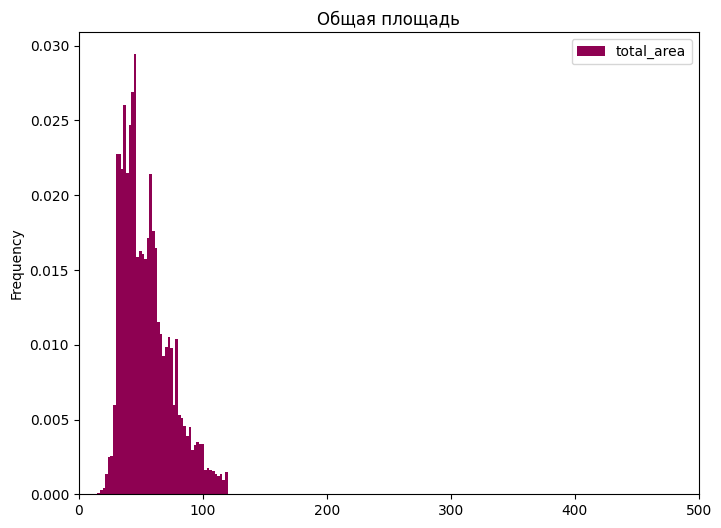

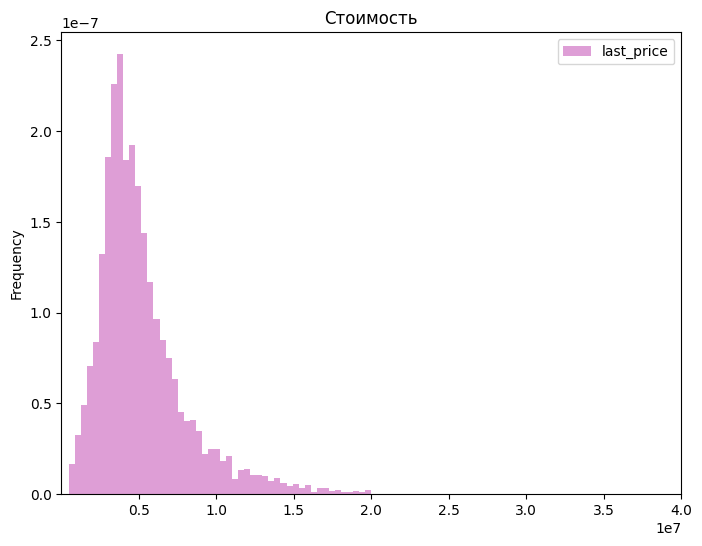

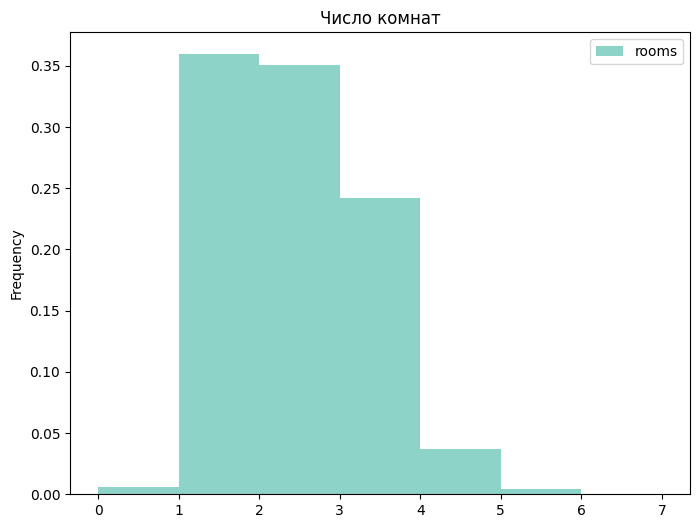

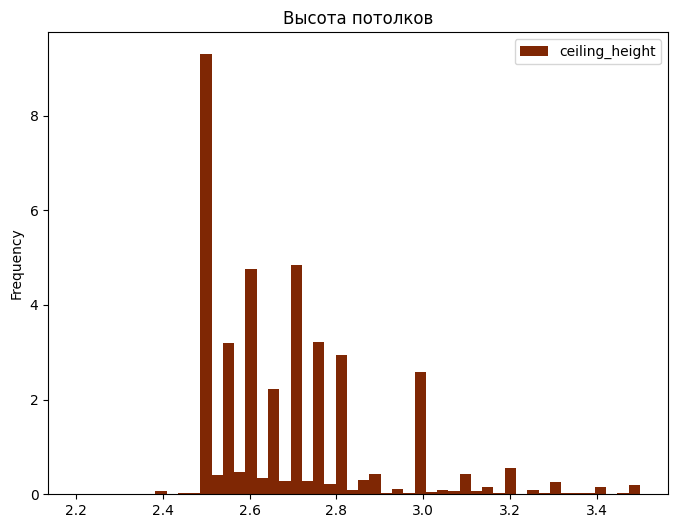

In [42]:
data.plot(y = 'total_area', kind = 'hist', density = True, bins = 50, xlim = (0, 500), figsize = (8, 6), title = 'Общая площадь', colormap = 'PiYG')
data.plot(y = 'last_price', kind = 'hist', density = True, bins = 50, xlim = (12190, 40000000.0), figsize=(8, 6), title = 'Стоимость', colormap = 'tab20b_r')
data.plot(y = 'rooms', kind = 'hist', density = True, bins = 7, range = (0, 7), figsize = (8, 6), title = 'Число комнат', colormap = 'Set3')
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, range = (2.2, 3.5), density = True, figsize = (8, 6), title = 'Высота потолков', colormap = 'Oranges_r')
plt.show()

In [43]:
print('Медианное значение площади:', data.total_area.median())
print('Медианное значение цены:', data.last_price.median())
print('Медианное значение высоты потолков:', data.ceiling_height.median())

Медианное значение площади: 50.1
Медианное значение цены: 4500000.0
Медианное значение высоты потолков: 2.65


**Вывод**

Медианное значение площади - 50 кв.м., распределение имеет вид Пуассоновского с пиком около 40 кв.м.
Медианная стоимость квартиры составляет 4.5 млн.
Наибольшее количество квартир однокомнатные, хотя двухкомнатных всего лишь немногим меньше.
Высота потолков составляет 2.65 метра.

**Рассмотрим распределение времени продаж**

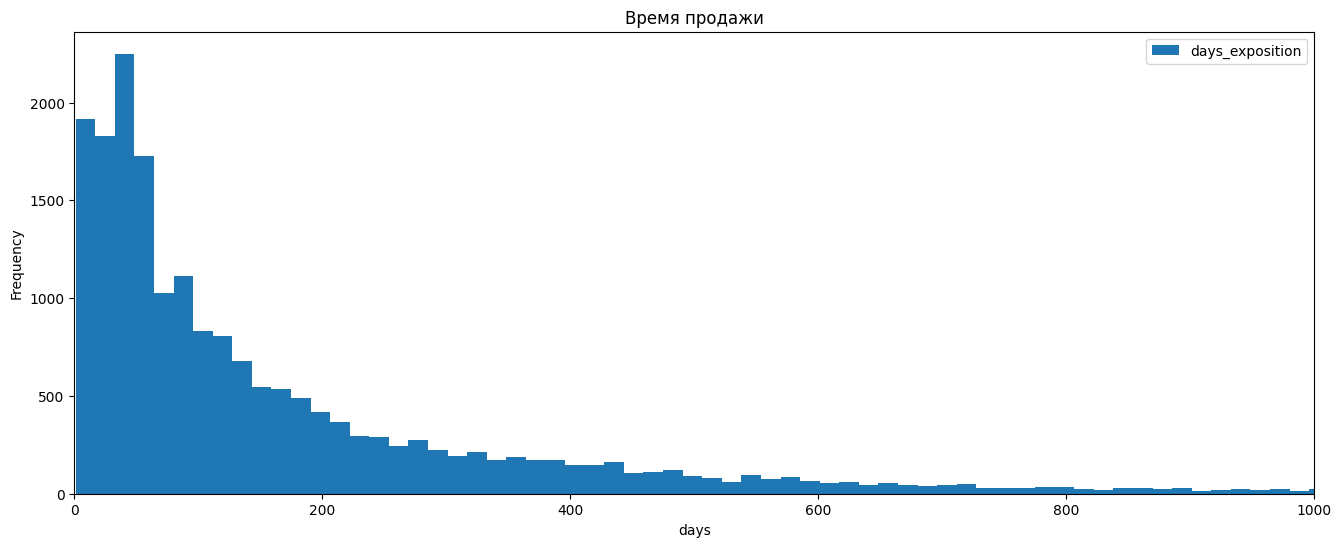

In [44]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, figsize = (16, 6), xlim = (0, 1000), title = 'Время продажи')
plt.xlabel('days')
plt.show()

In [45]:
print('Медианное значение времени, требующееся на продажу квартиры: {:.0f}'.format(data.days_exposition.median()))
print('Среднее значение времени на продажу квартиры: {:.1f}'.format(data.days_exposition.mean()))

Медианное значение времени, требующееся на продажу квартиры: 93
Среднее значение времени на продажу квартиры: 175.3


**Медианное значение времени продажи квартиры составляет 95 дней, среднее - 180 , что говорит о наличии сильных выбросов. Вызовем boxplot**

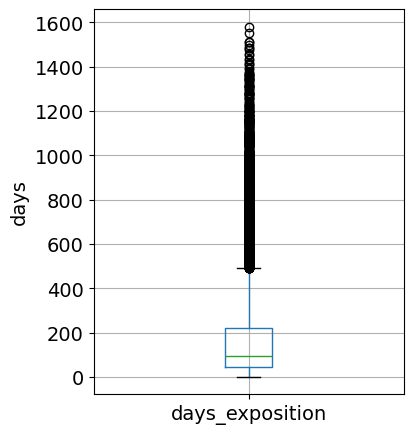

In [46]:
data.boxplot(['days_exposition'], figsize=(4,5), fontsize=14)
plt.ylabel('days', fontsize=14)
plt.show()

**Избавимся от аномальных значений. Будем считать продажу быстрой, если она уложилась в неделю, и медленной, если она длилась более полутора лет**

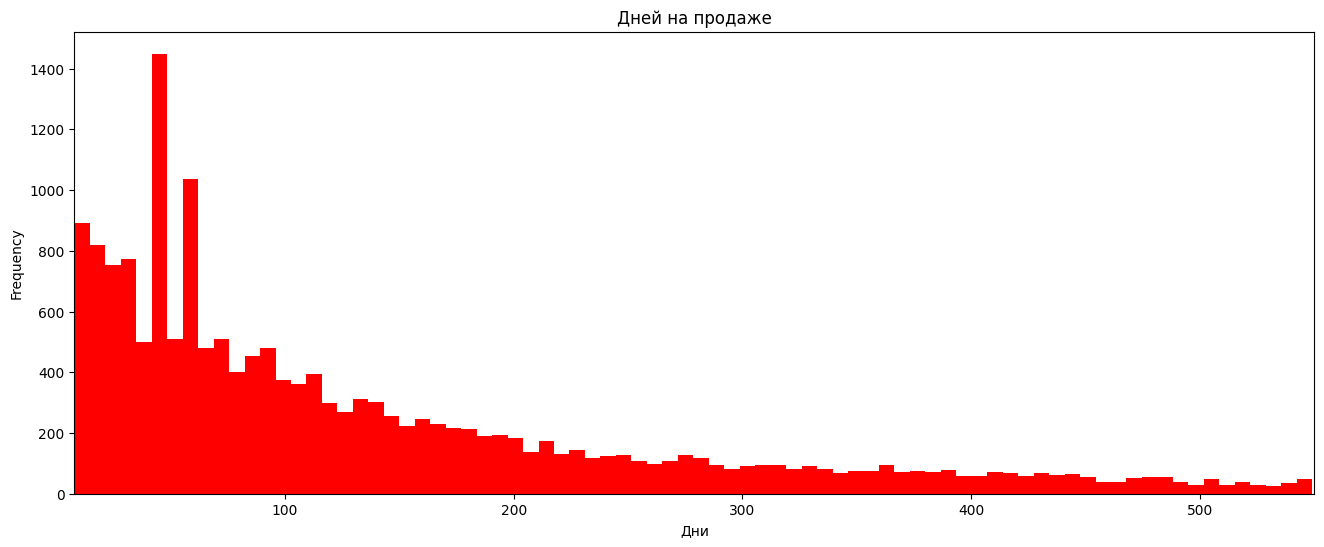

In [47]:
good_exposition_data = data.query('7<days_exposition<550')['days_exposition'] # избавляемся от выбросов и аномальных 
                                                                              # по скорости продаж
good_exposition_data = good_exposition_data.astype(int)
good_exposition_data.plot(kind = 'hist', bins = 80, xlim = (8, 550), figsize = (16, 6), colormap = 'bwr_r')
plt.xlabel('Дни')
plt.title('Дней на продаже')
plt.show()

In [48]:
good_exposition_data.value_counts().head(4)

days_exposition
45    861
60    532
30    200
90    156
Name: count, dtype: int64

**Значения 45, 60, 30, 90 - самые популярные и явно отличаются от других в большую сторону**

In [49]:
print(f"Медианное значение времени продажи - порядка {good_exposition_data.median()} дней")

Медианное значение времени продажи - порядка 90.0 дней


**Посмотрим, как стоимость квартиры зависит от площади , числа комнат , удалённости от центра**

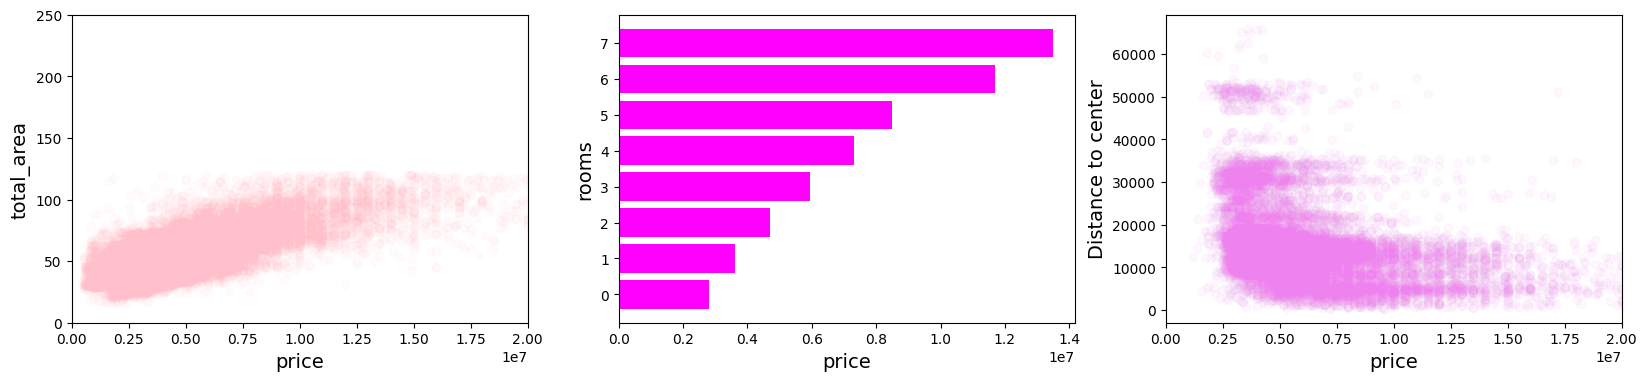

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 4))

ax1.scatter(data['last_price'], data['total_area'], c = 'pink', alpha = 0.05)
ax1.set_xlim([0, 20000000])
ax1.set_ylim([0, 250])
ax1.set_ylabel('total_area', fontsize = 14)
ax1.set_xlabel('price', fontsize = 14)

rooms_price = data[['rooms', 'last_price']].groupby(['rooms']).median()
ax2.barh( rooms_price.index, rooms_price['last_price'], color = 'magenta')
ax2.set_ylabel('rooms', fontsize = 14)
ax2.set_xlabel('price', fontsize = 14)
y_pos = np.arange(0, 8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([str(i) for i in range(0, 8)])

ax3.scatter(data['last_price'], data['cityCenters_nearest'], c = 'violet', alpha = 0.05)
ax3.set_xlim([0, 20000000])
ax3.set_ylabel('Distance to center', fontsize = 14)
ax3.set_xlabel('price', fontsize = 14)

plt.show()

In [51]:
data[['last_price', 'total_area', 'cityCenters_nearest', 'rooms']].corr()

,last_price,total_area,cityCenters_nearest,rooms
last_price,1.000000,0.735474,-0.346756,0.439876
total_area,0.735474,1.000000,-0.171292,0.793398
cityCenters_nearest,-0.346756,-0.171292,1.000000,-0.103201
rooms,0.439876,0.793398,-0.103201,1.000000


**На графике зависимости стоимости квартиры от общей площади явно видна положительная корреляция.
На столбчатой диаграмме также заметна увеличивающаяся стоимость квартиры с увеличением числа комнат.
На графике зависимости стоимости квартиры от расстояния до центра города также видна зависимость, предположительно - гиперболическая. Чем дальше квартира - тем дешевле она стоит**

**Рассмотрим как зависит стоимость квартиры от этажа**

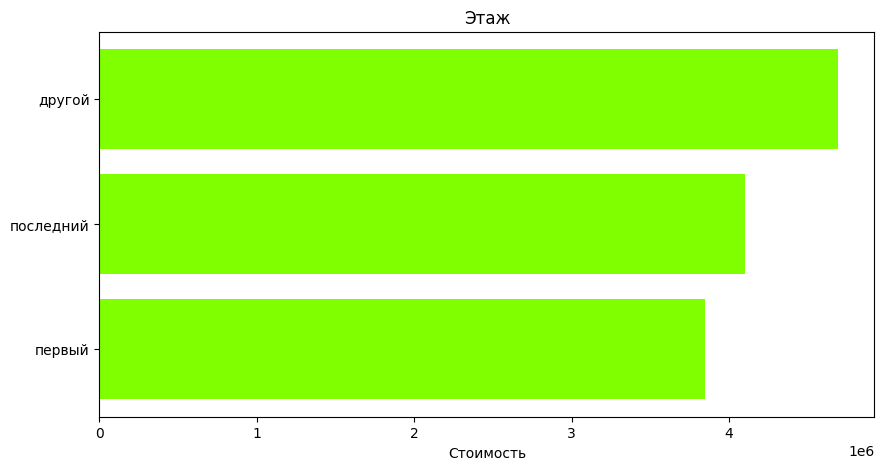

In [52]:
floor_price = data[['floor_category', 'last_price']].groupby(['floor_category']).median().sort_values('last_price')
plt.figure(figsize=(10, 5))
plt.barh(floor_price.index, floor_price['last_price'], color='chartreuse' )
plt.title('Этаж')
plt.xlabel('Стоимость')
plt.show()

**Квартиры на первом этаже, как правило, дешевле других. Квартиры на последнем также стоят дешевле**

**Рассмотрим как зависит стоимость квартиры от даты размещения: дня недели, месяца и года.**

**ГОД**

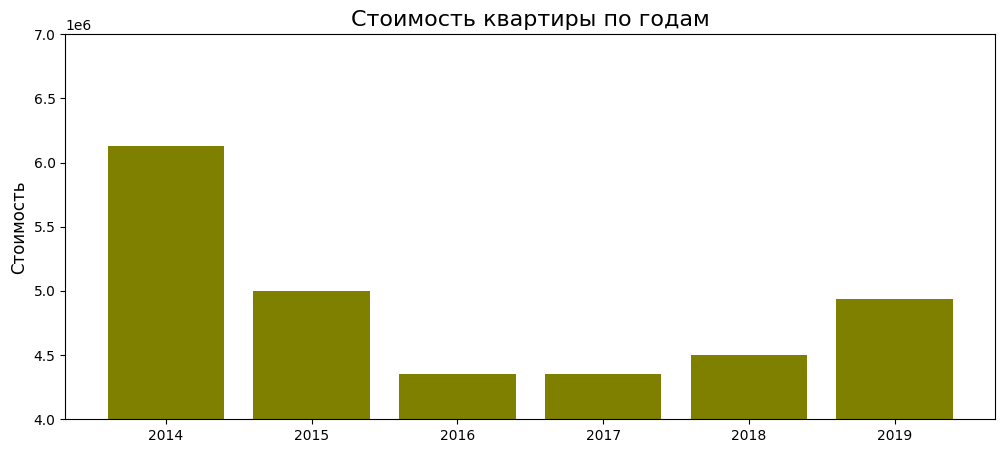

In [53]:
year_price = data[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12, 5))
plt.bar(year_price.index, year_price['last_price'], color='olive')
plt.title('Стоимость квартиры по годам', fontsize = 16)
plt.ylabel('Стоимость', fontsize = 12)
plt.ylim(4000000, 7000000)
plt.show()

**С 2014 года стоимость квартир сильно упала, однако с 2017 тренд меняется на растущий**

**МЕСЯЦ**

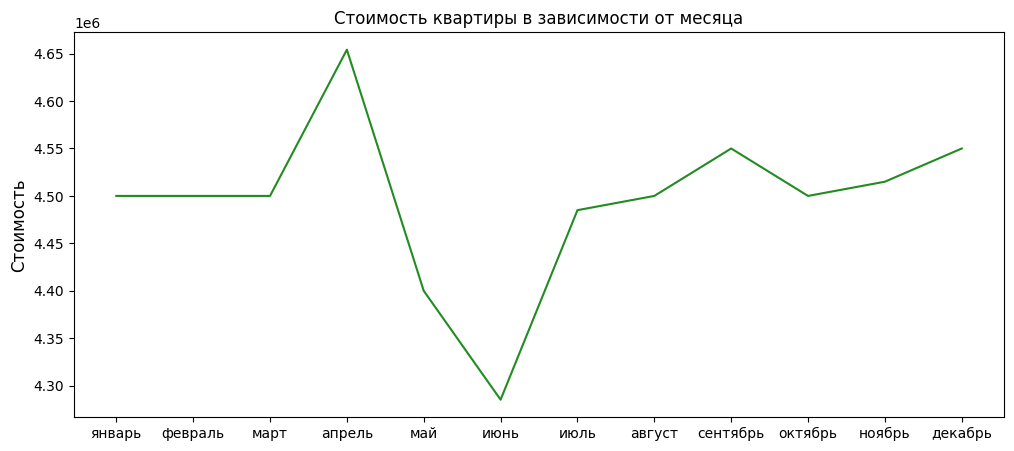

In [54]:
month_price = data[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price.index = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
plt.figure(figsize = (12, 5))
plt.plot(month_price.index, month_price['last_price'], color = 'forestgreen')
plt.title('Стоимость квартиры в зависимости от месяца')
plt.ylabel('Стоимость', fontsize = 12)
plt.show()

**В июне квартиры продаются дешевле, чем в остальные месяцы. Пик стоимости приходится на апрель**

**ДЕНЬ**

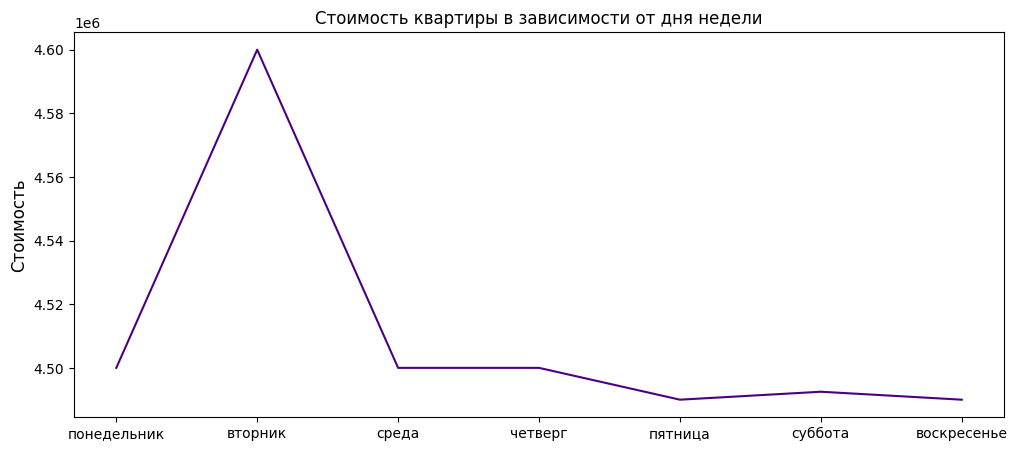

In [55]:
day_price = data[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price.index = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
plt.figure(figsize = (12, 5))
plt.plot(day_price.index, day_price['last_price'], color = 'indigo')
plt.ylabel('Стоимость', fontsize = 12)
plt.title('Стоимость квартиры в зависимости от дня недели')
plt.show()

**В воскресенье квартиры продаются дешевле, чем в остальные дни. А по вторникам цена обычно выше**

**Десять населенных пунктов с самой высокой стоимостью кв. метра**

In [56]:
top_locals = data.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10).index.values.tolist()
data_filtered = data.query('locality_name in @top_locals')
data_filtered.groupby('locality_name')['price_for_square_meter'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      108645.684395
Пушкин               101913.956187
деревня Кудрово       92312.310411
посёлок Парголово     90348.996281
посёлок Мурино        85563.326907
посёлок Шушары        78643.827638
Колпино               75370.025473
Гатчина               68974.051834
Всеволожск            67173.646003
Выборг                58336.368985
Name: price_for_square_meter, dtype: float64

**Самые дорогие квартиры располагаются, ожидаемо, в Санкт-Петербурге (115 тыс.), затем идет Пушкин.
Низкая стоимость квартир в Выборге - в два раза дешевле, чем в Санкт-Петербурге.
Во Всеволожске и Гатчине примерно одинаковые цены за кв.м., порядка 68 тыс.**

**Стоимость квартир в центре**

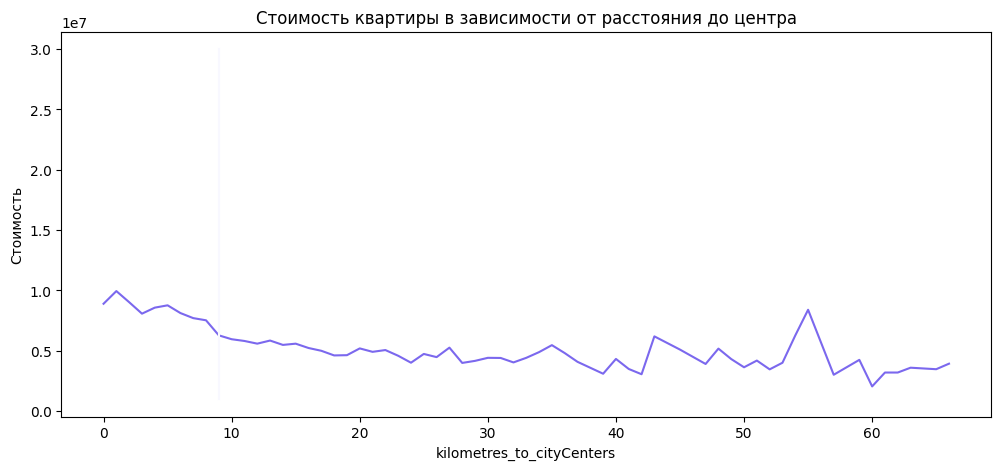

In [57]:
data['kilometres_to_cityCenters'] = (data['cityCenters_nearest'] / 1000 ).round()
plt.figure(figsize = (12, 5))
data.groupby('kilometres_to_cityCenters')['last_price'].mean().plot(color = 'mediumslateblue')
plt.plot([9, 9],[1000000, 30000000], color = 'ghostwhite')
plt.title('Стоимость квартиры в зависимости от расстояния до центра')
plt.ylabel('Стоимость')
plt.show()

**На графике видно, что цена сильно меняется на 8-9 километрах, следовательно это и есть граница центра города**

**Проанализируем квартиры в центре**

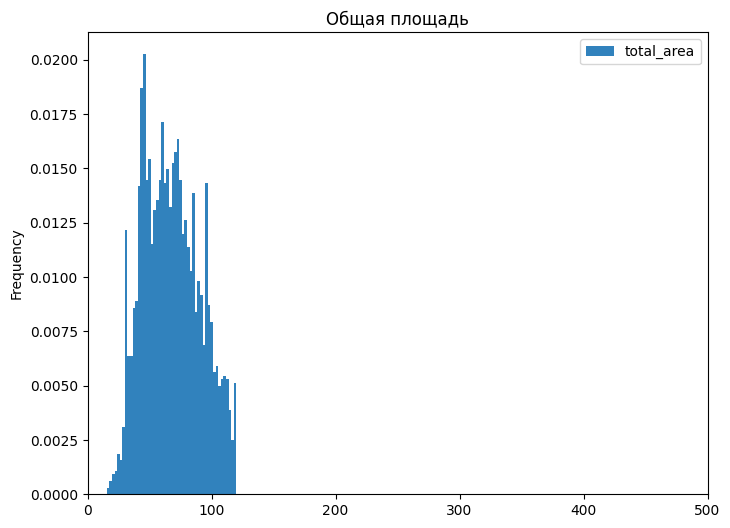

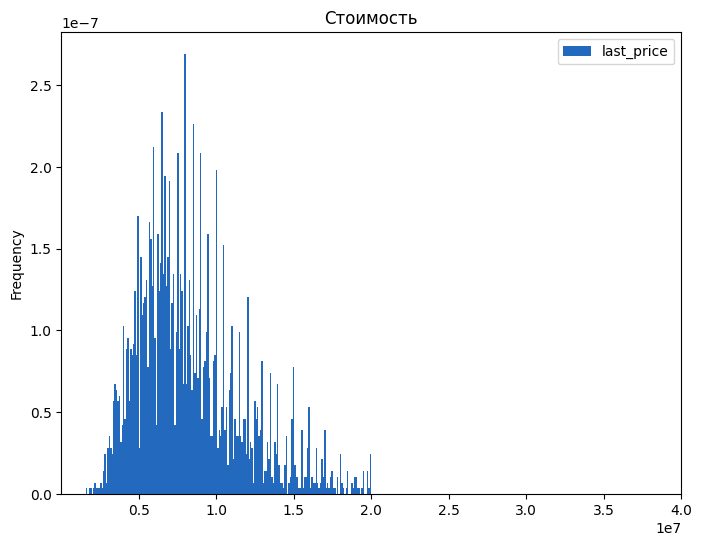

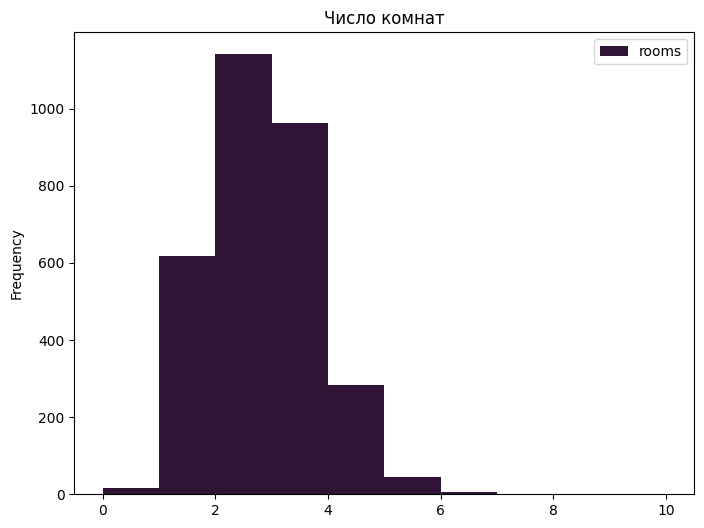

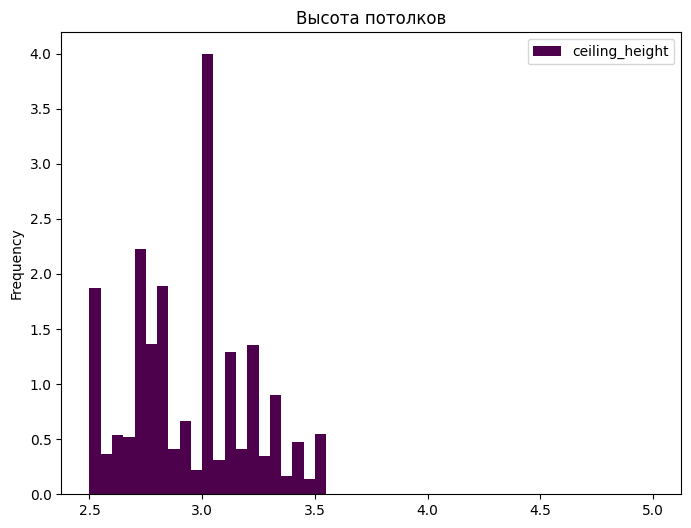

In [58]:
data_flats_in_center = data.query('kilometres_to_cityCenters <= 8 and locality_name == "Санкт-Петербург"')
data_flats_in_center.plot(y = 'total_area', kind = 'hist', density = True, bins = 50, xlim = (0, 500), figsize = (8, 6), title = 'Общая площадь', colormap = 'tab20c')
data_flats_in_center.plot(y = 'last_price', kind = 'hist', density = True, bins = 200, xlim = (12190, 40000000.0), figsize = (8, 6), title = 'Стоимость', colormap = 'vlag')
data_flats_in_center.plot(y = 'rooms', kind = 'hist', bins = 10, range = (0, 10), figsize = (8, 6), title = 'Число комнат', colormap = 'twilight_shifted_r')
data_flats_in_center.plot(y = 'ceiling_height', kind = 'hist', bins = 50, range = (2.5, 5), density = True, figsize = (8, 6), title = 'Высота потолков', colormap = 'BuPu_r')
plt.show()

In [59]:
print('Медианное значение площади', data_flats_in_center['total_area'].median())
print('Медианное значение цены', data_flats_in_center['last_price'].median())
print('Медианное значение высоты потолков', data_flats_in_center.ceiling_height.median())

Медианное значение площади 66.5
Медианное значение цены 7700000.0
Медианное значение высоты потолков 2.95


**Квартиры в центре города могут "похвастать" большей площадью - 66 кв.м.
Такие квартиры также в среднем более дорогие, медианная стоимость составляет почти 8 млн. В то время, как для всех квартир эта стоимость равняется 4,5 миллионам.
Квартиры в центре также чаще двух- или трехкомнатные, тогда как в общей массе больше "однушек".
У данных квартир также выше потолки, в среднем - 3 метра.**

**Выясним какие факторы влияют на стоимость квартиры в центре (число комнат, этаж, удалённость от центра, дата размещения объявления) и сравним с выводом по всем квартирам**

**ЧИСЛО КОМНАТ**

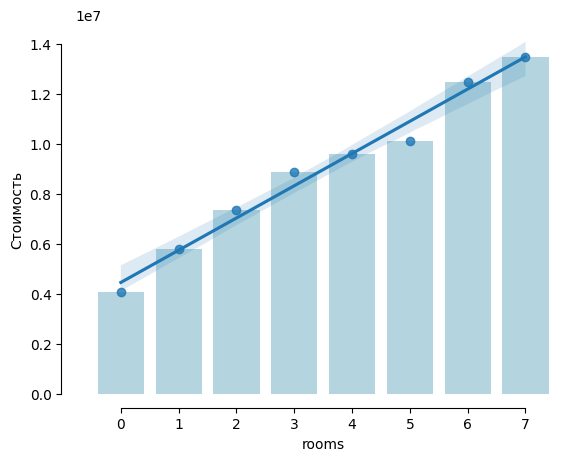

In [60]:
rooms_price_center = data_flats_in_center[['rooms', 'last_price']].groupby(['rooms']).median()
ax = sns.barplot(x = rooms_price_center.index, y = rooms_price_center['last_price'] , color = 'lightblue')
for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x = np.arange(0, len(rooms_price_center)), y = rooms_price_center['last_price'], ax = ax)
sns.despine(offset = 10, trim = True)
ax.set_ylabel('Стоимость')
plt.show()

**Стоимость квартиры также увеличивается в зависимости от количества комнат, как и во всем датасете**

**ЭТАЖ**

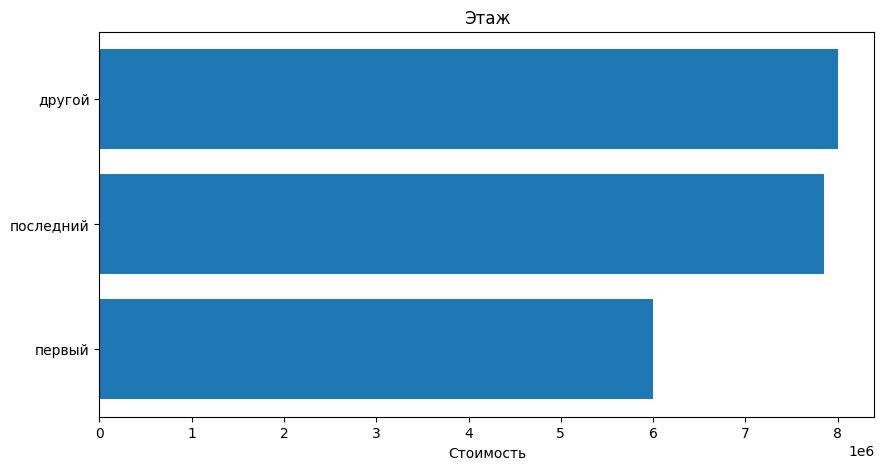

In [61]:
floor_price_center = (data_flats_in_center[['floor_category', 'last_price']].groupby('floor_category').median().sort_values('last_price'))
plt.figure(figsize = (10, 5))
plt.barh(floor_price_center.index, floor_price_center['last_price'])
plt.title('Этаж')
plt.xlabel('Стоимость')
plt.show()

**Квартиры на первом этаже в центре Санкт-Петербурга также дешевле**

**УДАЛЕННОСТЬ**

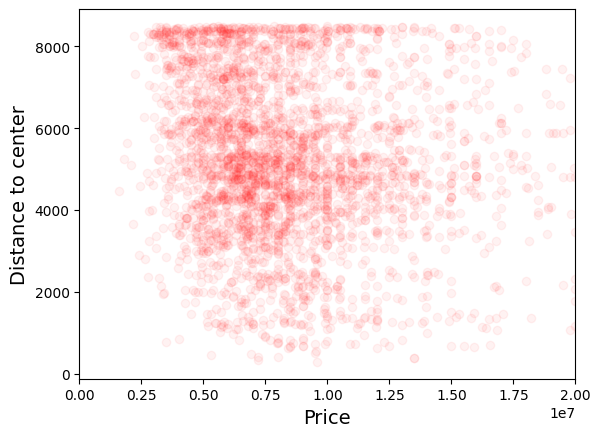

In [62]:
plt.scatter(data_flats_in_center['last_price'], data_flats_in_center['cityCenters_nearest'], c = 'r', alpha = 0.05)
plt.xlim(0, 20000000)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Distance to center', fontsize = 14)
plt.show()

In [63]:
data_flats_in_center[['last_price', 'cityCenters_nearest']].corr()

,last_price,cityCenters_nearest
last_price,1.000000,-0.141776
cityCenters_nearest,-0.141776,1.000000


**А вот зависимости от удаленности нет, квартиры могут стоить в центре по разному**

**Посмотрим зависимость от даты**

**ГОД**

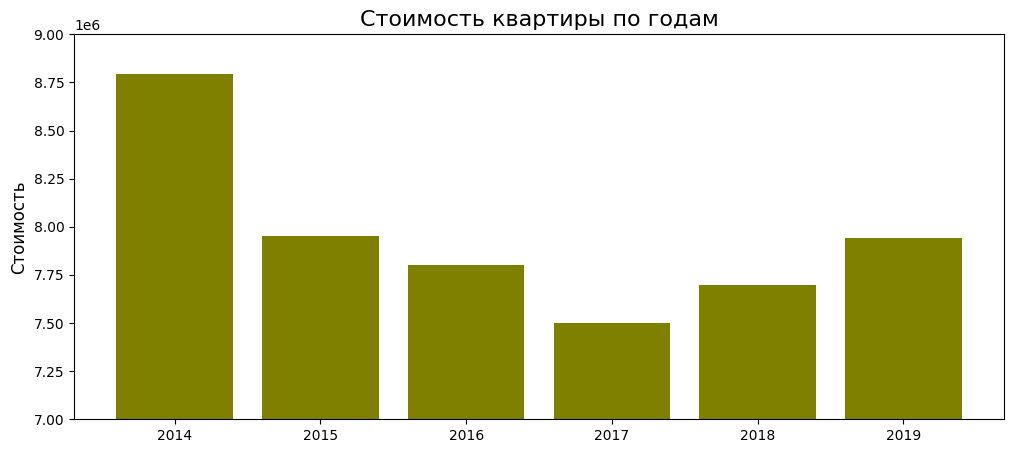

In [64]:
year_price_center = data_flats_in_center[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12, 5))
plt.bar(year_price_center.index, year_price_center['last_price'], color = 'olive')
plt.title('Стоимость квартиры по годам', fontsize = 16)
plt.ylabel('Стоимость', fontsize = 12)
plt.ylim(7000000, 9000000)
plt.show()

**Диаграмма точно такая же, как и для всей выборки, с 2014 стоимость упала, а c 2017 начинает расти**

**МЕСЯЦ**

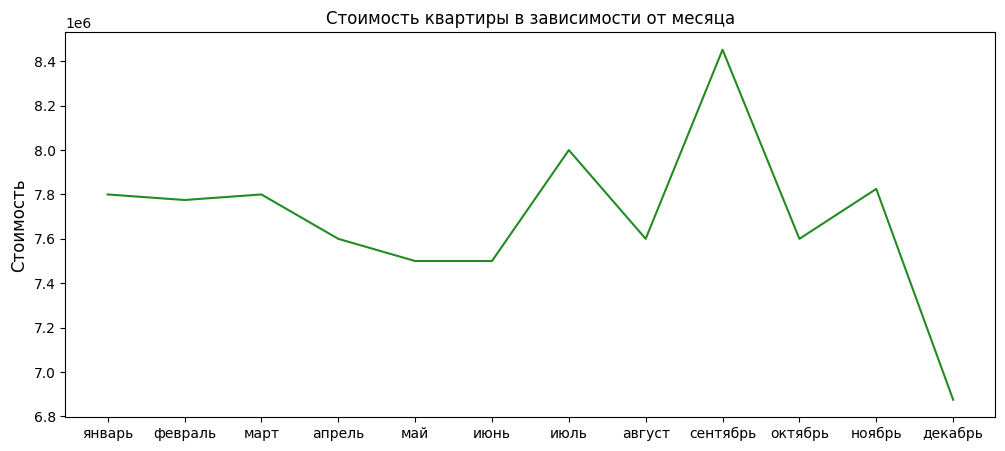

In [65]:
month_price_center = data_flats_in_center[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price_center.index = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
plt.figure(figsize=(12, 5))
plt.plot(month_price_center.index, month_price_center['last_price'], color = 'forestgreen')
plt.title('Стоимость квартиры в зависимости от месяца')
plt.ylabel('Стоимость', fontsize = 12)
plt.show()

**Для квартир в центре Санкт-Петербурга картина меняется: наименьшая стоимость соответствует квартирам, продаваемым в декабре.
А наибольшая стоимость в сентябре, вероятно, все хотят купить квартиру поближе к работе перед началом учебного/рабочего года**

**ДЕНЬ**

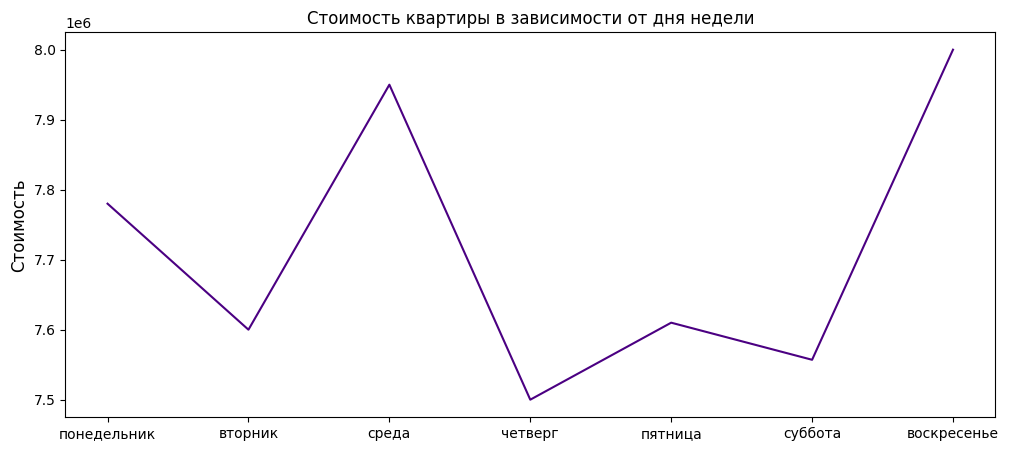

In [66]:
day_price_center = data_flats_in_center[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price_center.index = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
plt.figure(figsize=(12, 5))
plt.plot(day_price_center.index, day_price_center['last_price'], color = 'indigo')
plt.ylabel('Стоимость', fontsize = 12)
plt.title('Стоимость квартиры в зависимости от дня недели')
plt.show()

**Зависимость стоимости квартиры от дня недели также разительно отличается, дешевле всего квартиры выставляются на продажу по четвергам, а по наиболее высокой цене по воскресеньям**

# Общий вывод

**На первом шаге при знакомстве с датасетом были обнаружены множественные пропуски, а также много аномалий, от которых мы в последствии успешно избавились.**

**На втором шаге для пропущенных значений этажности и высоты потолков домов были восстановлены значения по доступным данным из датасета. Заполнены другие пропущенные значения. Изменены типы данных, обработаны выбросы и аномальные значения.**

**Также были посчитаны и добавлены в таблицу:**
1. Цена квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.

**На третьем шаге был произведен исследовательский анализ данных и было выявлено, что:**
1. В среднем квартира продается около трех месяцев
2. Стоимость квартиры прямопропорционально зависит от площади и количества комнат и обратно пропорциональна расстоянию до центра
3. На первом этаже квартиры стоят дешевле
4. Стоимость квартир с 2014 по 2017 снизилась более чем на 2,5 млн. руб.
5. В июне квартиры продаются по самой низкой стоимости, а в апреле по самой высокой
6. Квартира выставленная на продажу в воскресенье в среднем продается на 200 тыс. дешевле чем в пик - во вторник
7. Самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине, а самые дешевые в Выборге
8. Граница центра - 9 километров
9. Квартиры в центре сильно отличаются в цене, они примерно в два раза дороже. Площадь квартир больше в среднем на 15 кв.м. Чаще встречаются двух- и трехкомнатные квартиры, нежели однокомнатные. Более высокие потолки - 3 метра, для остальных квартир из датасета - 2,65. 
10. Стоимость квартир в центре также зависит от количества комнат, от этажа (на первом - дешевле), а от удаленности цена квартиры не зависит, в отличие от квартир из всей выборки.
11. Стоимость квартир в центре Санкт-Петербурга также упала с 2014 года.
12. По самой дешевой цене квартиры продаются в декабре, по самой дорогой - в сентябре
13. Квартиры, размещаемые на продажу по четвергам продаются дешевле, чем в остальные дни. Пик стоимости приходится на воскресенье